<a href="https://colab.research.google.com/github/rahool010/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
# check the shape of the dataset
print(df.shape)

(119390, 32)


In [6]:
# check the datatypes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
# data summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


The dataset has 32 features (Continuous and Categorical)  with one identified dependant variable which is 'is_canceled'

In [8]:
# describe() method show statistical data like count,min,max,mean,etc for numerical values of dataframe
# so let's now get the summary for categorical values 
df.describe(include='object').transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [9]:
# check missing values in the dataset
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

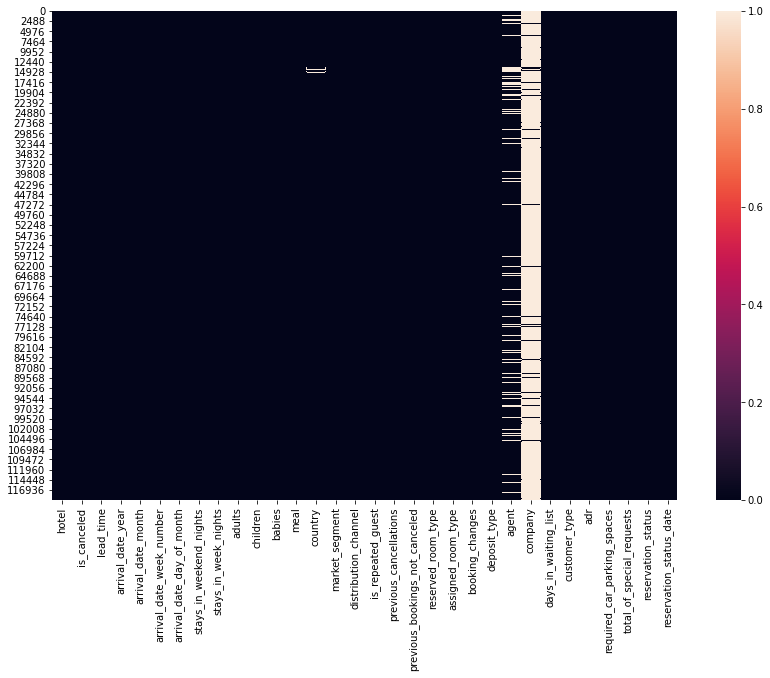

In [10]:
# let's visualize the null value columns
plt.figure(figsize=(14,9))
sns.heatmap(df.isnull())
plt.show()

In [ ]:
"""
plt.figure(figsize=(14,6))
data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
sns.countplot(data['hotel'],hue='is_canceled', data = data, palette = 'seismic')
plt.title("Distribution of the hotel based on the booking status")
plt.show()
"""

'\nplt.figure(figsize=(14,6))\ndata[\'is_canceled\'].replace({1: \'canceled\', 0: \'not canceled\'}, inplace = True)\nsns.countplot(data[\'hotel\'],hue=\'is_canceled\', data = data, palette = \'seismic\')\nplt.title("Distribution of the hotel based on the booking status")\nplt.show()\n'

# **Data Preparation  / Data Cleaning**

In [14]:
# printing unique values of each column 

for col in df.columns:
    print(f"{col}: \n{df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

is_canceled: 
[0 1]

lead_time: 
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

In [ ]:
# let's create a new column to indicate
# 0 - reserved room and assigned room is different
# 1 - reserved room and assigned room is same
df['same_room'] = np.where(df['reserved_room_type']==df['assigned_room_type'],'1', '0') 

In [ ]:
df['same_room'].value_counts()

1    104473
0     14917
Name: same_room, dtype: int64

In [ ]:
# create a list of categorical and numerical columns 
cat_cols=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
          "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
          "customer_type","reservation_status","is_repeated_guest","same_room"]
print("Categorical columns:",cat_cols)

num_cols = [col for col in df.columns if col not in cat_cols]
print("Numerical columns:",num_cols)

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'is_canceled', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'is_repeated_guest', 'same_room']
Numerical columns: ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date']


# Data Cleaning

In [ ]:
# columns with null values and their missing percentage
"""
null_per=df.isnull().sum()/df.shape[0]*100
null_cols={}
for i in df.columns:
    if df[i].isnull().sum()>0:
        null_cols[i]=null_per[i]
null_cols 
"""

'\nnull_per=df.isnull().sum()/df.shape[0]*100\nnull_cols={}\nfor i in df.columns:\n    if df[i].isnull().sum()>0:\n        null_cols[i]=null_per[i]\nnull_cols \n'

In [11]:
# check the count and percentage of null values
null_df=pd.DataFrame({'null_values':df.isnull().sum(),
                  'null_percent':df.isnull().sum()/df.shape[0]*100})
null_df=null_df[null_df['null_values']>0]
null_df

,null_values,null_percent
children,4,0.003350
country,488,0.408744
agent,16340,13.686238
company,112593,94.306893


In [12]:
# company has a lot of null values so it is deleted and  
# reservation_status will not be relevant for our data analysis purpose, so drop this columns.

df = df.drop(['company','reservation_status_date'], axis=1)
print(df.shape)

(119390, 30)


In [13]:
# children country and agent has less than 20% missing values
# so missing values can be imputed using global constants
# fill null in agent with 0 because it can be assumed that booking was without agent
# same with children and fill null in country with global constant (unknown)

null_replace = {'children' : 0, 'country' : 'Unknown', 'agent': 0}

df = df.fillna(null_replace)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
data.isnull().sum().sum()

0

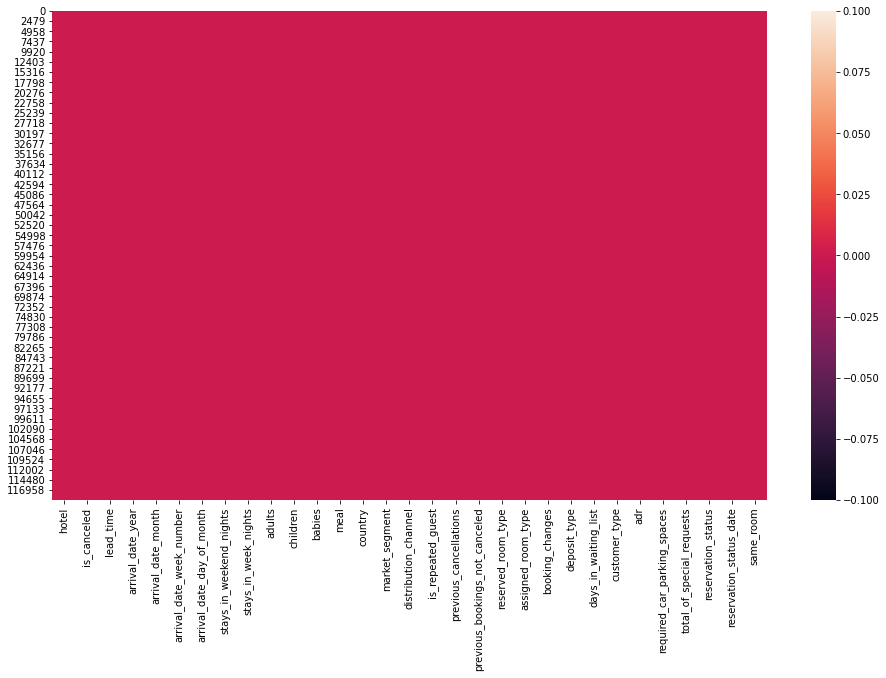

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(data.isnull())
plt.show()

TypeError: ignored

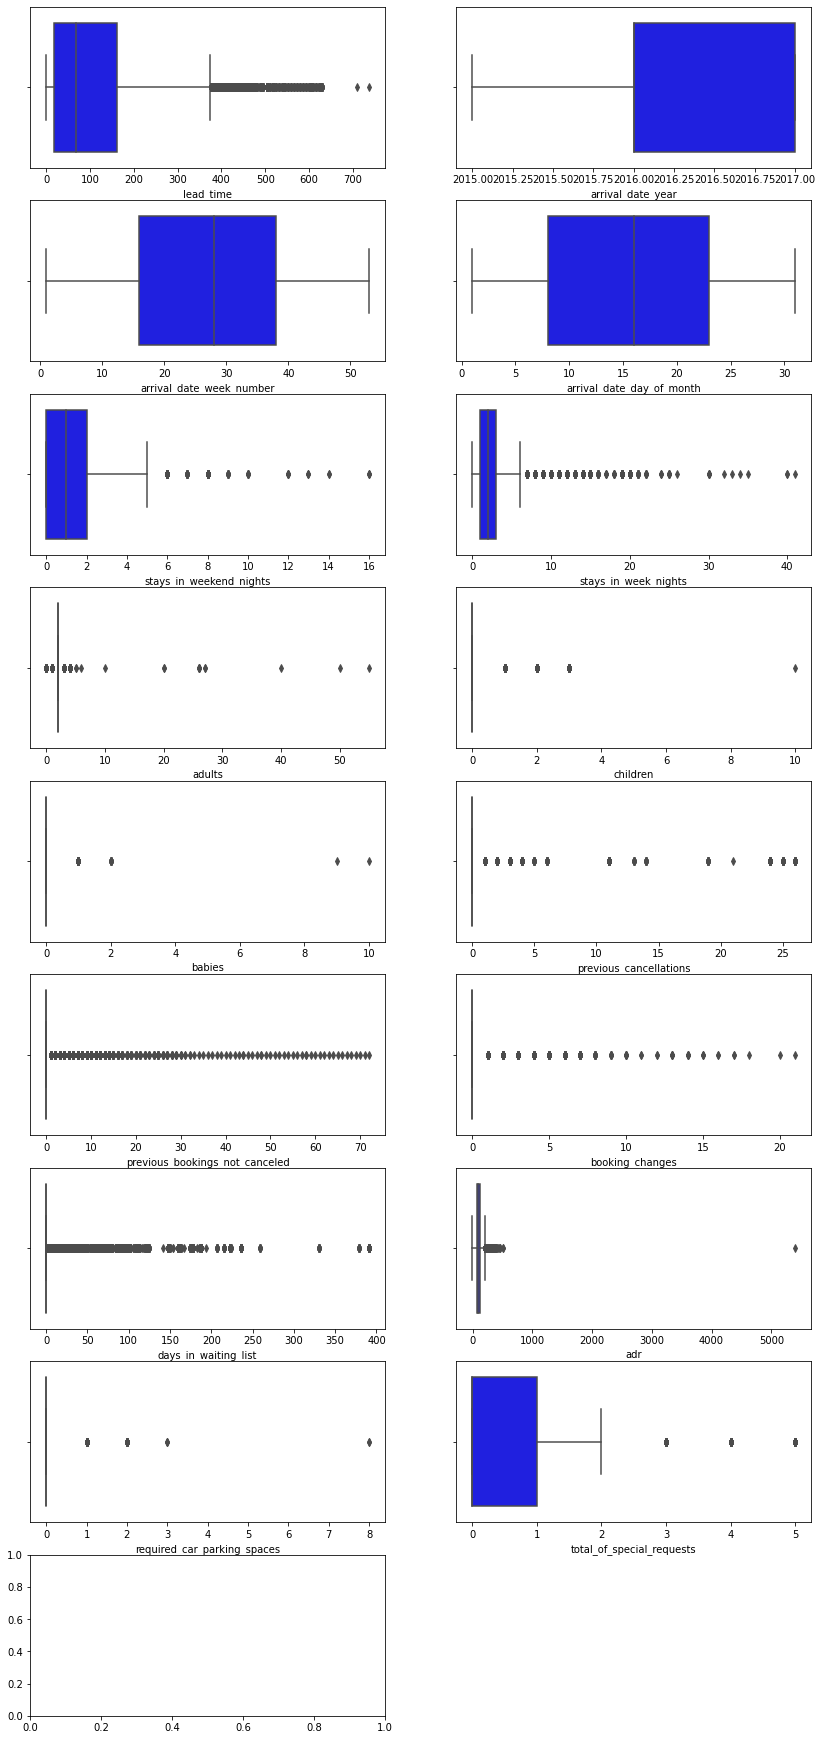

In [ ]:
plt.figure(figsize=(14,35))
for i, col in enumerate(num_cols):
  plt.subplot(10,2,i+1)
  sns.boxplot(x=data[col], color = 'blue')
  #data[[col]].boxplot(vert=False)
plt.show()

There are a lot of outliers in our dataset. These outliers needs to be removed.
We can remove outliers using InterQuartileRange (IQR) or it can also be treated by Standard scorer (z test) and standard deviation

In [ ]:
# Here we are dropping outliers using InterQuartileRange
lower=data.quantile(0.25)
upper=data.quantile(0.75)
IQR = upper - lower
print("\nInterQuartileRange=\n",IQR)
data=data[~((data < (lower-1.5*IQR))| (data > (upper+1.5*IQR))).any(axis=1)]
data.head()
data.shape


InterQuartileRange=
 is_canceled                         1.0
lead_time                         143.0
arrival_date_year                   1.0
arrival_date_week_number           22.0
arrival_date_day_of_month          15.0
stays_in_weekend_nights             2.0
stays_in_week_nights                2.0
adults                              0.0
children                            0.0
babies                              0.0
is_repeated_guest                   0.0
previous_cancellations              0.0
previous_bookings_not_canceled      0.0
booking_changes                     0.0
days_in_waiting_list                0.0
adr                                56.0
required_car_parking_spaces         0.0
total_of_special_requests           1.0
dtype: float64


(55020, 31)

We have reduced the outliers

# **Eda and Visualization**

# **How many bookings were cancelled?**

## **What is the most preferred meal of guests**

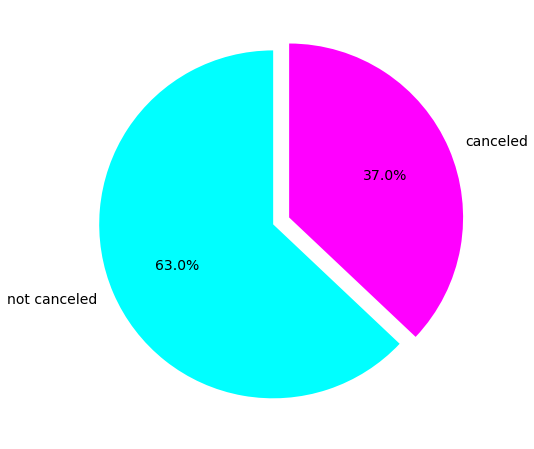

In [15]:
plt.rcParams['figure.figsize'] = 8,8
df['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
labels = df['is_canceled'].value_counts().index.tolist() # tolist() will convert the index to list for easy manipulation

sizes = df['is_canceled'].value_counts().tolist() # Convert value counts to list

# explode will determine how much each section is separated from each other 
explode = (0, 0.1)

#colors = ['lightskyblue','yellow'] # color for pie chart

# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# textprops will adjust the size of text
plt.pie(sizes, explode=explode, labels=labels, colors=['cyan','magenta'],
        autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

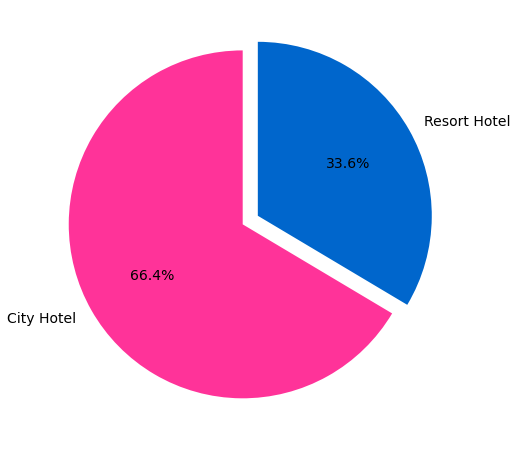

In [16]:
plt.rcParams['figure.figsize'] = 8,8

labels = df['hotel'].value_counts().index.tolist() 
sizes = df['hotel'].value_counts().tolist()  
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=['#ff3399','#0066cc'],
        autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

plt.show()

# **What is the booking ratio between Resort hotel and City hotel?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


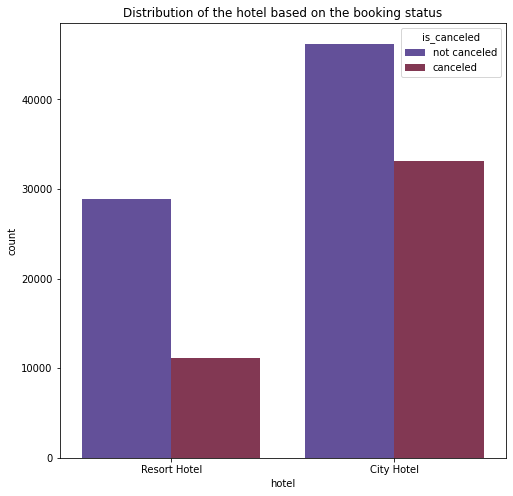

In [18]:
#plt.figure(figsize=(14,6))
df['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
sns.countplot(df['hotel'], data = df, hue='is_canceled', palette = 'twilight');
#plt.title('Number of Cancelled Bookings for City hotel and Resort hotel ')
plt.title("Distribution of the hotel based on the booking status")
plt.show()

# **Where do the guests come from?**

In [19]:
country_booking = df['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking.head(10)

,country,Percentage
0,PRT,0.406986
1,GBR,0.101591
2,FRA,0.087235
3,ESP,0.071765
4,DEU,0.061035
5,ITA,0.031544
6,IRL,0.028269
7,BEL,0.019616
8,BRA,0.018628
9,NLD,0.017623


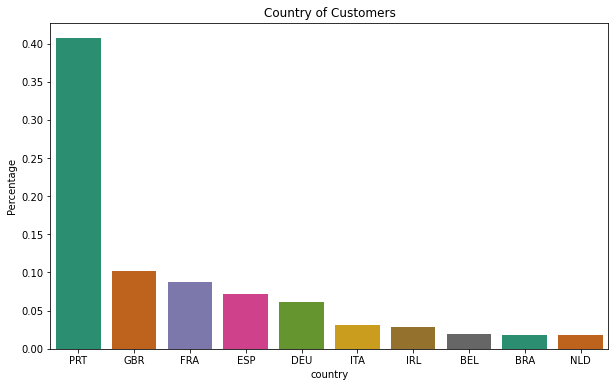

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='country', y='Percentage', data=country_booking.head(10),
           palette = 'Dark2')
plt.title('Country of Customers')
plt.show()

# **Which year and month has the maximum number of bookings?**

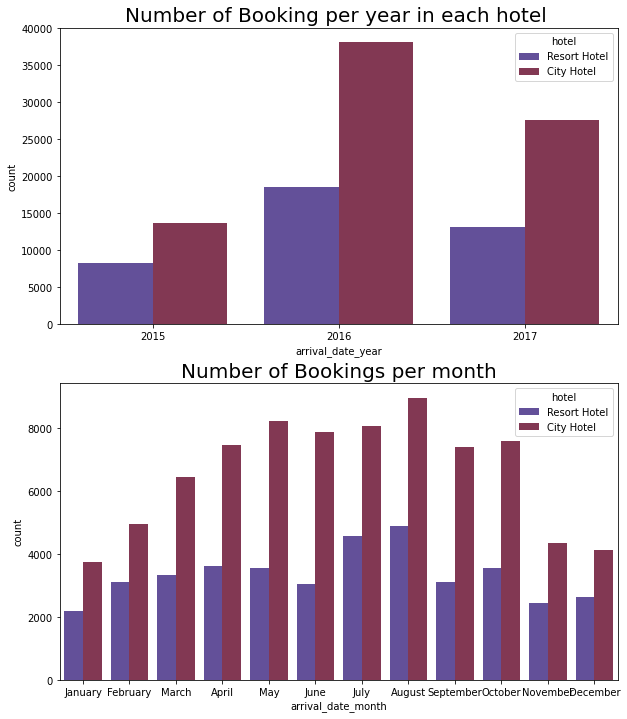

In [21]:
# arrival per year and month
plt.figure(figsize=(10, 12))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=df,palette='twilight')
plt.title("Number of Booking per year in each hotel ", size=20)

months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October', 'November', 'December']
plt.subplot(2, 1, 2)
sns.countplot(x = 'arrival_date_month', hue='hotel', data=df, order=months, palette='twilight')
plt.title('Number of Bookings per month', size=20)
#plt.subplots_adjust(right=1.7)

plt.show()

# **Which was the mostly booked accommodation type?**

In [22]:
#For further analysis, Select only those booking which did not get cancelled.
df_not_canceled = df[df['is_canceled'] == 0]

In [26]:
# Select single, couple, adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

# create the list of Category names and its total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends', 'Adults_group']
count = [single.shape[0],couple.shape[0], family.shape[0], adults.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plt.figure(figsize=(8,6))
sns.barplot(x=names, y=count_percent, data=df, palette='hot' )
plt.title("Type of Accommodation")
plt.xlabel('Accomodations')
plt.ylabel('Booking in %')
plt.show()

ZeroDivisionError: ignored

# **Which nationals make the highest number of reservations?**

In [27]:
# Create data of  top 10 countries
df_prt = df[df['country'] == 'PRT']
df_gbr = df[df['country'] == 'GBR']
df_fra = df[df['country'] == 'FRA']
df_esp = df[df['country'] == 'ESP']
df_deu = df[df['country'] == 'DEU']
df_ita = df[df['country'] == 'ITA']
df_irl = df[df['country'] == 'IRL']
df_bel = df[df['country'] == 'BEL']
df_bra = df[df['country'] == 'BRA']
df_nld = df[df['country'] == 'NLD']

# Create a dataset by combining data of top 10 countries
df_top10 = pd.concat([df_fra, df_gbr, df_prt, df_deu, df_esp,
                        df_ita,df_irl, df_bel, df_bra, df_nld]).reset_index(drop=True)

In [28]:
reservations = df_top10.groupby(['country','reservation_status']).lead_time.count()
print(reservations)

country  reservation_status
BEL      Canceled                464
         Check-Out              1868
         No-Show                  10
BRA      Canceled                799
         Check-Out              1394
         No-Show                  31
DEU      Canceled               1205
         Check-Out              6069
         No-Show                  13
ESP      Canceled               2145
         Check-Out              6391
         No-Show                  32
FRA      Canceled               1902
         Check-Out              8481
         No-Show                  32
GBR      Canceled               2412
         Check-Out              9676
         No-Show                  41
IRL      Canceled                825
         Check-Out              2543
         No-Show                   7
ITA      Canceled               1315
         Check-Out              2433
         No-Show                  18
NLD      Canceled                382
         Check-Out              1717
         N

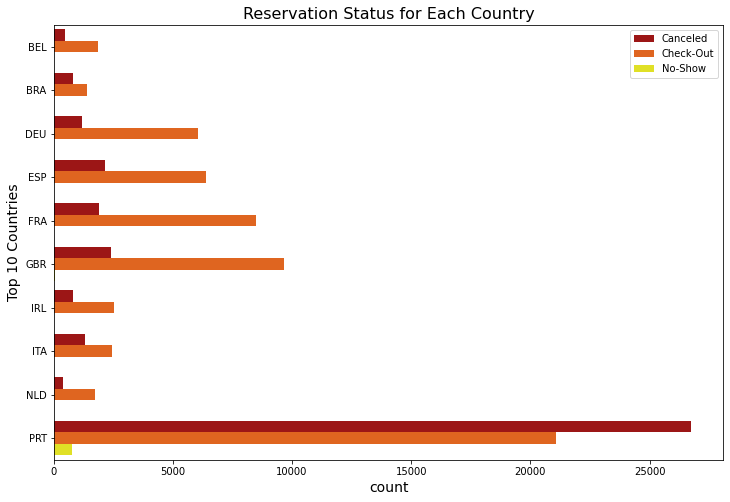

In [29]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'lead_time', y = 'country', hue = 'reservation_status',
            data = reservations.reset_index(), palette = 'hot')
plt.title('Reservation Status for Each Country', fontsize = 16)
plt.xlabel('count', fontsize = 14)
plt.ylabel('Top 10 Countries', fontsize = 14)
L=plt.legend()
plt.show()

# **Which month has maximum number of special requests each year?**

In [30]:
special_request = df[df['total_of_special_requests'] != 0][['arrival_date_year','arrival_date_month','total_of_special_requests']]
special_request

,arrival_date_year,arrival_date_month,total_of_special_requests
4,2015,July,1
5,2015,July,1
7,2015,July,1
8,2015,July,1
12,2015,July,3
...,...,...,...
119380,2017,August,1
119384,2017,August,2
119386,2017,August,2
119387,2017,August,4


In [31]:
special_req_2015 = df[(df['arrival_date_year'] == 2015) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2015

,arrival_date_month,total_of_special_requests
4,July,1
5,July,1
7,July,1
8,July,1
12,July,3
...,...,...
82645,December,2
82650,December,2
82732,December,1
82958,August,1


In [32]:
# Sorting months in month wise
months = special_req_2015.arrival_date_month.unique()
special_req_2015['arrival_date_month'] = pd.Categorical(special_req_2015['arrival_date_month'], categories=months, ordered=True)

In [33]:
month_wise_special_req_2015 = special_req_2015.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2015

,arrival_date_month,total_of_special_requests
0,July,1226
1,August,2188
2,September,1869
3,October,1953
4,November,950
5,December,1392


In [34]:
special_req_2016 = df[(df['arrival_date_year'] == 2016) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
special_req_2016.head()

,arrival_date_month,total_of_special_requests
3738,January,1
3739,January,1
3740,January,1
3741,January,2
3743,January,1


In [35]:
# Sorting months
months = special_req_2016['arrival_date_month'].unique()
special_req_2016['arrival_date_month'] = pd.Categorical(special_req_2016['arrival_date_month'], categories=months, ordered=True)

In [36]:
month_wise_special_req_2016 = special_req_2016.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2016

,arrival_date_month,total_of_special_requests
0,January,988
1,February,1622
2,March,2079
3,April,2223
4,May,2342
5,June,2633
6,July,3039
7,August,3454
8,September,3399
9,October,3563


In [37]:
special_req_2017 = df[(df['arrival_date_year'] == 2017) & (df['total_of_special_requests'] != 0)][['arrival_date_month','total_of_special_requests']]
#special_request_of_2017.head()

In [38]:
# Sorting months
months = special_req_2017['arrival_date_month'].unique()
special_req_2017['arrival_date_month'] = pd.Categorical(special_req_2017['arrival_date_month'], categories=months, ordered=True)

In [39]:
month_wise_special_req_2017 = special_req_2017.groupby('arrival_date_month')['total_of_special_requests'].sum().reset_index()
month_wise_special_req_2017

,arrival_date_month,total_of_special_requests
0,January,2258
1,February,2619
2,March,2793
3,April,3560
4,May,3938
5,June,3536
6,July,4240
7,August,4581


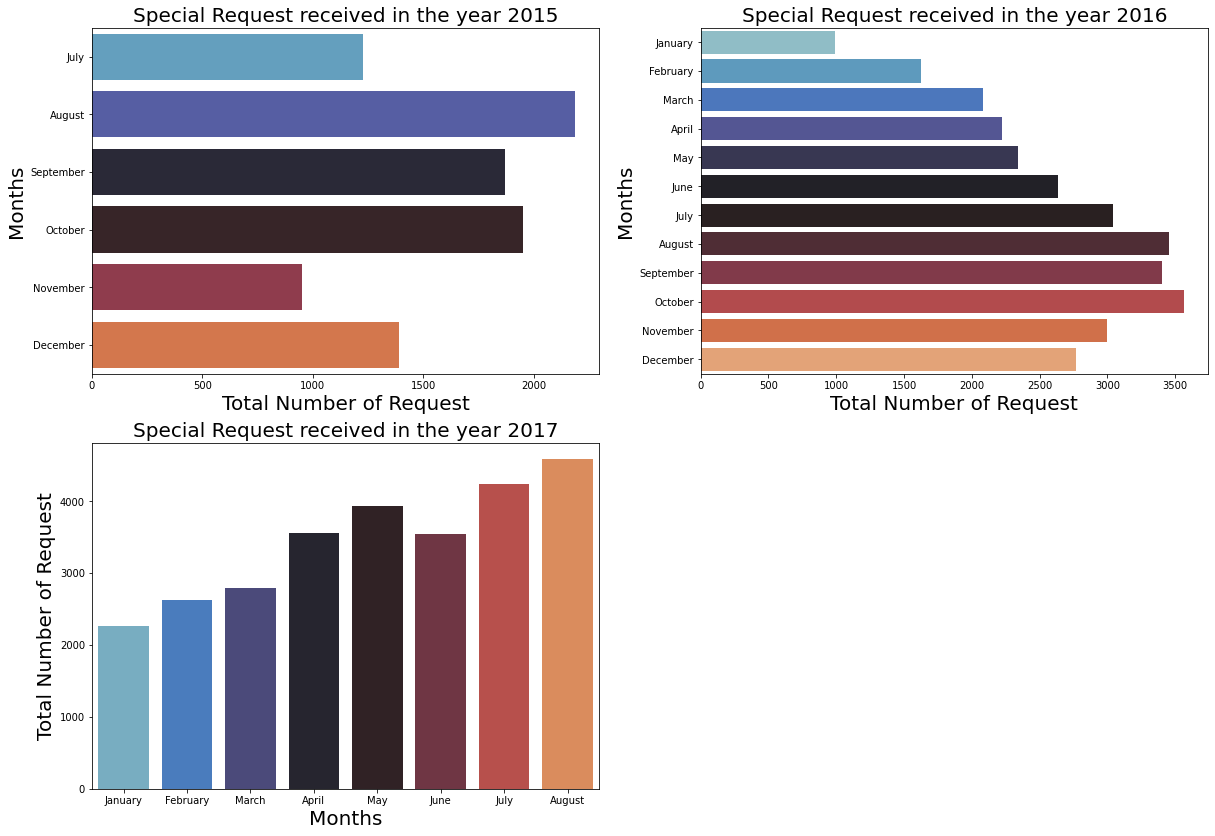

In [40]:
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
sns.barplot(y='arrival_date_month', x='total_of_special_requests',
           data=month_wise_special_req_2015, palette='icefire')
plt.title('Special Request received in the year 2015', fontsize = 20)
plt.ylabel('Months', fontsize = 20)
plt.xlabel('Total Number of Request', fontsize = 20)

plt.subplot(2,2,2)
sns.barplot(y='arrival_date_month', x='total_of_special_requests',
           data=month_wise_special_req_2016, palette='icefire')
plt.title('Special Request received in the year 2016', fontsize = 20)
plt.ylabel('Months', fontsize = 20)
plt.xlabel('Total Number of Request', fontsize = 20)

plt.subplot(2,2,3)
sns.barplot(x='arrival_date_month', y='total_of_special_requests',
           data=month_wise_special_req_2017, palette='icefire')
plt.title('Special Request received in the year 2017', fontsize = 20)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Total Number of Request', fontsize = 20)

plt.show()

# **Deposit Type and Cancellation for Market Segment** 

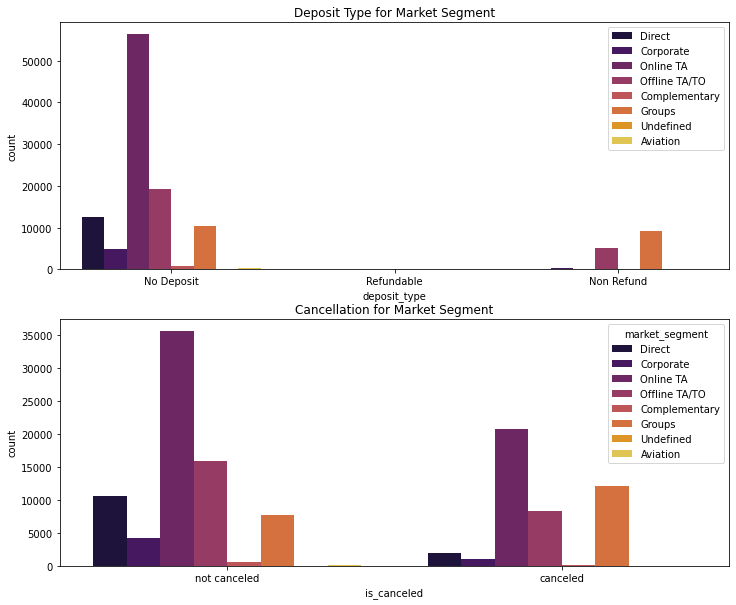

In [41]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(data=df,x='deposit_type',hue='market_segment',
             palette='inferno')
plt.title('Deposit Type for Market Segment')
plt.legend(loc = 1)
plt.subplot(212)
sns.countplot(data=df,x='is_canceled',hue='market_segment',
             palette='inferno')
plt.title('Cancellation for Market Segment')
plt.show()

In [ ]:
meal = data['meal'].value_counts().reset_index().rename(columns={'index':'meal','meal':'count'})
meal

,meal,count
0,BB,91863
1,HB,14434
2,SC,10638
3,Undefined,1165
4,FB,798


## **What is the booking status for each type of hotel**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


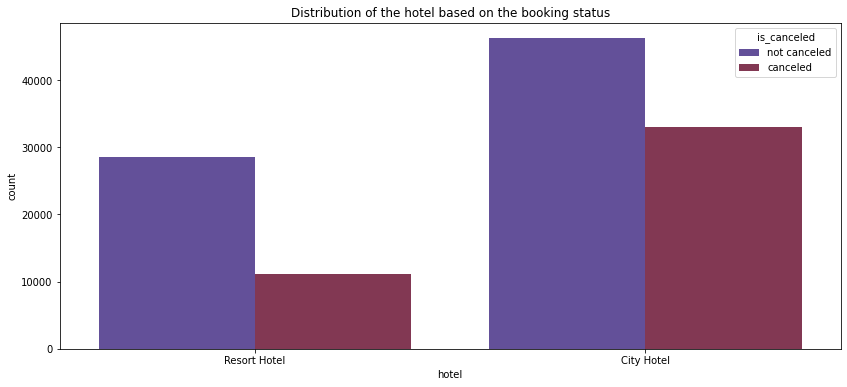

In [ ]:
plt.figure(figsize=(14,6))
data['is_canceled'].replace({1: 'canceled', 0: 'not canceled'}, inplace = True)
sns.countplot(data['hotel'], data = data, hue='is_canceled', palette = 'twilight');
#plt.title('Number of Cancelled Bookings for City hotel and Resort hotel ')
plt.title("Distribution of the hotel based on the booking status")
plt.show()

Here we see most of the booking are in city hotel and also the cancellation rate is high in city hotel as compared to resort hotel

## Which Country has majority of reservations

In [ ]:
country_booking = data['country'].value_counts(normalize=True).rename_axis('country').reset_index(name='Percentage')
country_booking

,country,Percentage
0,PRT,0.408636
1,GBR,0.102012
2,FRA,0.087596
3,ESP,0.072062
4,DEU,0.061288
...,...,...
172,ASM,0.000008
173,MDG,0.000008
174,SMR,0.000008
175,SLE,0.000008


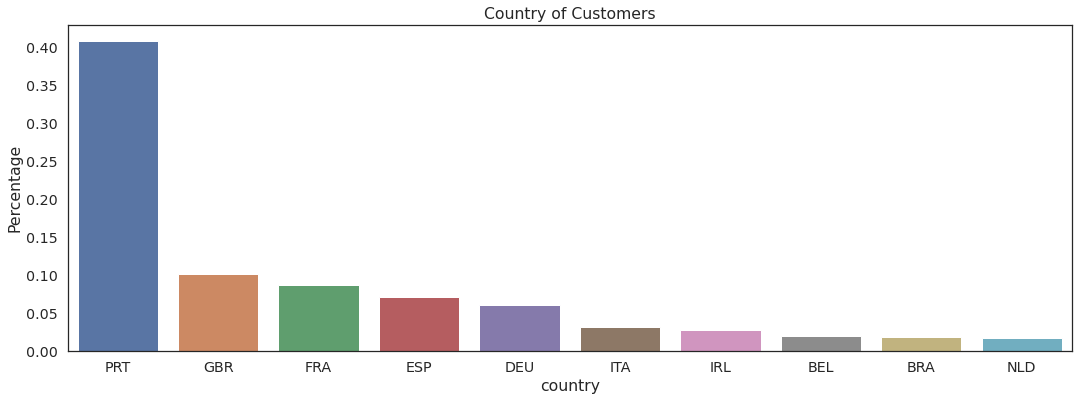

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(x='country', y='Percentage', data=country_booking.head(10))
plt.title('Country of Customers')
plt.show()

In [ ]:
customer = data['customer_type'].value_counts(normalize=True).rename_axis('Customer Type').reset_index(name='Percentage')
customer

,Customer Type,Percentage
0,Transient,0.750004
1,Transient-Party,0.210920
2,Contract,0.034281
3,Group,0.004794


## Which year and month has the maximum number of bookings

In [ ]:
busiest_month = data['arrival_date_month'].value_counts().reset_index(name='Percentage')
busiest_month

,index,Percentage
0,August,13852
1,July,12628
2,May,11779
3,October,11095
4,April,11045
5,June,10927
6,September,10467
7,March,9739
8,February,8012
9,November,6752


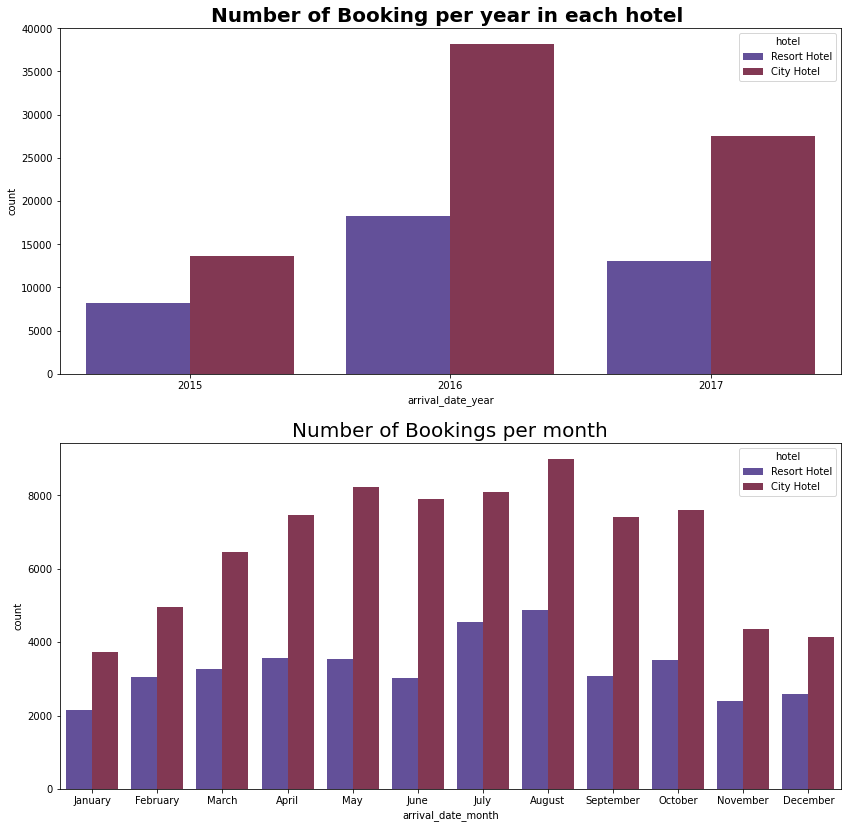

In [ ]:
# arrival per year and month
plt.figure(figsize=(14, 14))
plt.subplot(2, 1, 1)
sns.countplot(x='arrival_date_year',hue='hotel', data=data,palette='twilight')
plt.title("Number of Booking per year in each hotel ",fontweight="bold", size=20)

months=['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August','September', 'October', 'November', 'December']
plt.subplot(2, 1, 2)
sns.countplot(x = 'arrival_date_month', hue='hotel', data=data, order=months, palette='twilight')
plt.title('Number of Bookings per month', size=20)
#plt.subplots_adjust(right=1.7)

plt.show()

We can see most of the bookings were in the year 2016 and bookings were done in City hotel
Most bookings were done in the month of May,June, July, August.
It is clear that August, July and May are the most occupied months in case of both City and Resort Hotels

In [ ]:
# Total number of  Guests 

data['total_guests'] = data['adults'] + data['children'] + data['babies']
print(data.groupby('total_guests').size().sort_values(ascending = False))

total_guests
2.0     81880
1.0     22289
3.0     10479
4.0      3926
0.0       170
5.0       137
26.0        5
27.0        2
20.0        2
12.0        2
10.0        2
55.0        1
50.0        1
40.0        1
6.0         1
dtype: int64


In [ ]:
# Assigning name base on per adult count

for index,row in adults_count_without_kids_df.iterrows():
  if row['number_of_members'] == 1:
    adults_count_without_kids_df.at[index, 'label'] = "Single Person"
  elif row['number_of_members'] == 2:
    adults_count_without_kids_df.at[index, 'label'] =  "Mostly Couples"
  elif row['number_of_members'] >2:
    adults_count_without_kids_df.at[index, 'label'] =  "Group of Adults"
  else:
    adults_count_without_kids_df.at[index, 'label'] = 'No adults'

In [ ]:
# Summary
print(data.total_guests.describe())

count    118898.000000
mean          1.970546
std           0.721894
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: total_guests, dtype: float64


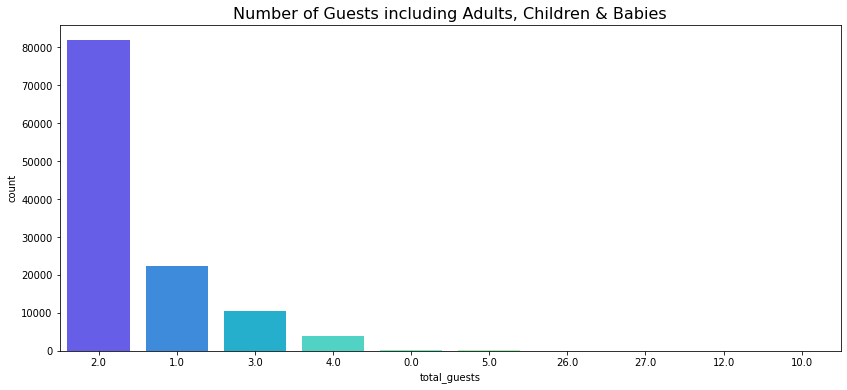

In [ ]:
plt.figure(figsize = (14, 6))
sns.countplot(x = 'total_guests', data = data,palette = 'rainbow',
              order = data['total_guests'].value_counts().head(10).index)
plt.title('Number of Guests including Adults, Children & Babies', fontsize = 16)
plt.show()

The trend shows that majority of reservations are for two people.
The second highest trend is for just one person. It can be presumed that this are solo travelers.

## Which nationals make the highest number of reservations?

In [ ]:
# Create data of  top 10 countries
data_prt = data[data['country'] == 'PRT']
data_gbr = data[data['country'] == 'GBR']
data_fra = data[data['country'] == 'FRA']
data_esp = data[data['country'] == 'ESP']
data_deu = data[data['country'] == 'DEU']
data_ita = data[data['country'] == 'ITA']
data_irl = data[data['country'] == 'IRL']
data_bel = data[data['country'] == 'BEL']
data_bra = data[data['country'] == 'BRA']
data_nld = data[data['country'] == 'NLD']

# Create a dataset by combining data of top 10 countries
data_top10 = pd.concat([data_fra, data_gbr, data_prt, data_deu, data_esp,
                        data_ita,data_irl, data_bel, data_bra, data_nld]).reset_index(drop=True)

In [ ]:
#data_top10.groupby('country')['reservation_status'].value_counts()

In [ ]:
reservation_countries = data_top10.groupby(['country','reservation_status']).lead_time.count()
print(reservation_countries)

country  reservation_status
BEL      Canceled                464
         Check-Out              1868
         No-Show                  10
BRA      Canceled                799
         Check-Out              1394
         No-Show                  31
DEU      Canceled               1205
         Check-Out              6069
         No-Show                  13
ESP      Canceled               2145
         Check-Out              6391
         No-Show                  32
FRA      Canceled               1902
         Check-Out              8481
         No-Show                  32
GBR      Canceled               2412
         Check-Out              9676
         No-Show                  41
IRL      Canceled                825
         Check-Out              2543
         No-Show                   7
ITA      Canceled               1315
         Check-Out              2433
         No-Show                  18
NLD      Canceled                382
         Check-Out              1717
         N

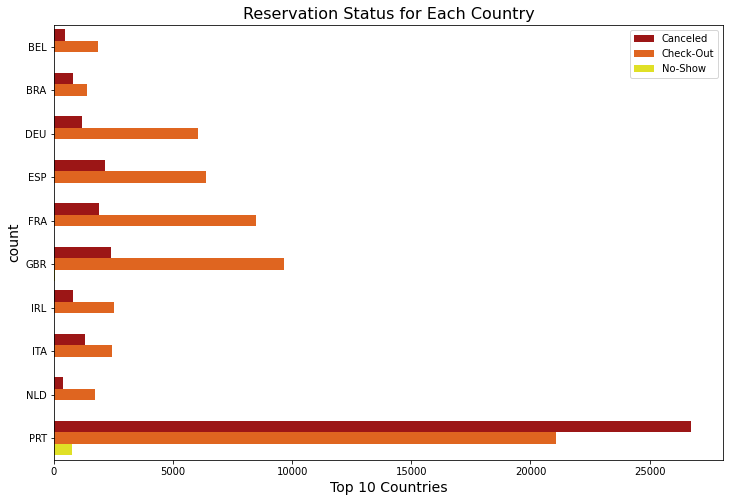

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'lead_time', y = 'country', hue = 'reservation_status',
            data = reservation_countries.reset_index(), palette = 'hot')
plt.title('Reservation Status for Each Country', fontsize = 16)
plt.ylabel('count', fontsize = 14)
plt.xlabel('Top 10 Countries', fontsize = 14)
L=plt.legend()
plt.show()

The above graph depicts that Portugal has the most number of reservations, but it also has more cancelations than check-outs.\
Portuguese nationals make the highest number of reservations. But the number of cancellation is higher than the number of checkouts

# How much do guests pay for a room per night

<function matplotlib.pyplot.show>

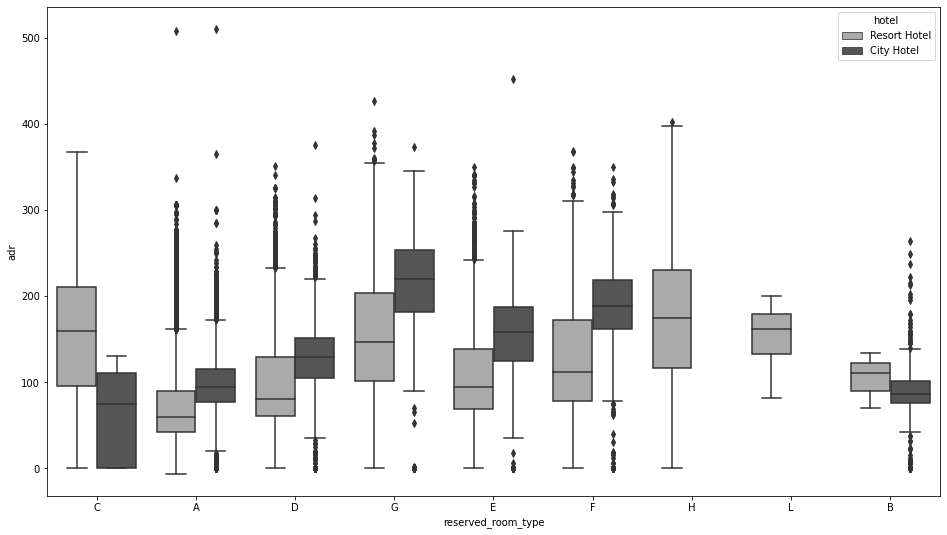

In [ ]:
data1 = data[data['is_canceled'] == 0]

plt.figure(figsize=(16,9))
sns.boxplot(data = data1, x = 'reserved_room_type', y = 'adr', hue = 'hotel', palette = 'binary')
plt.show

It can be observed that the prices varies a lot. The average price per room depends on the types of rooms and standard deviation

# **How does the price vary per night throught the year**

In [ ]:
df_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
df_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]

In [ ]:
resort_hotel = df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.322236
3,February,54.147478
4,January,48.708919
5,July,150.122528
6,June,107.921869
7,March,57.012487
8,May,76.657558
9,November,48.681640


In [ ]:
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [ ]:
merge_hotel = resort_hotel.merge(city_hotel, on='arrival_date_month')
merge_hotel.columns = ['months', 'resort_price', 'city_price']
merge_hotel

,months,resort_price,city_price
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


No handles with labels found to put in legend.


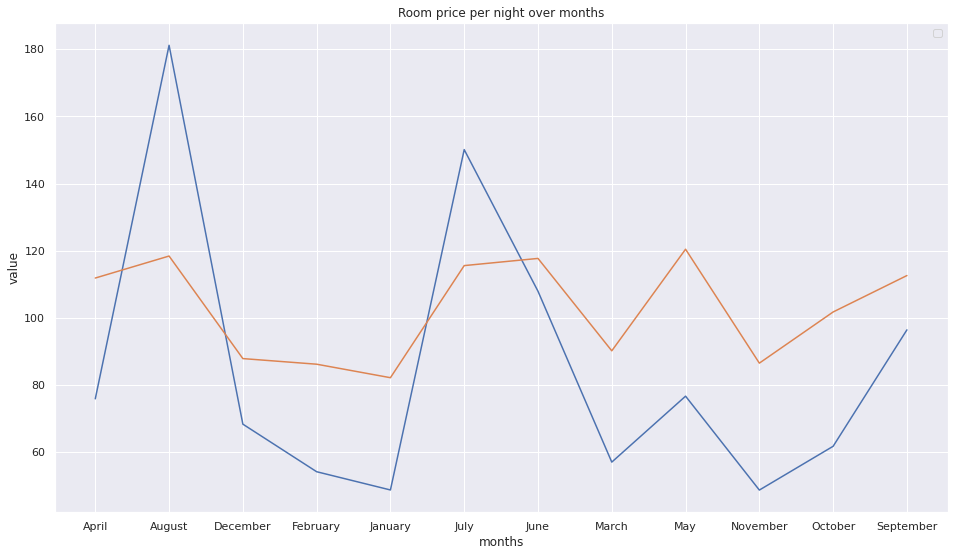

In [ ]:
plt.figure(figsize = (16, 9))
sns.set(style='darkgrid')
sns.lineplot(data = merge_hotel, x = 'months', y = 'resort_price')
sns.lineplot(data = merge_hotel, x = 'months', y = 'city_price')
plt.title("Room price per night over months")
plt.xlabel('months')
plt.ylabel('value')
plt.legend()
plt.show()

In [ ]:
cat_cols1 = ['is_repeated_guest','reserved_room_type','assigned_room_type','reservation_status',
             'is_canceled','same_room','customer_type','market_segment']

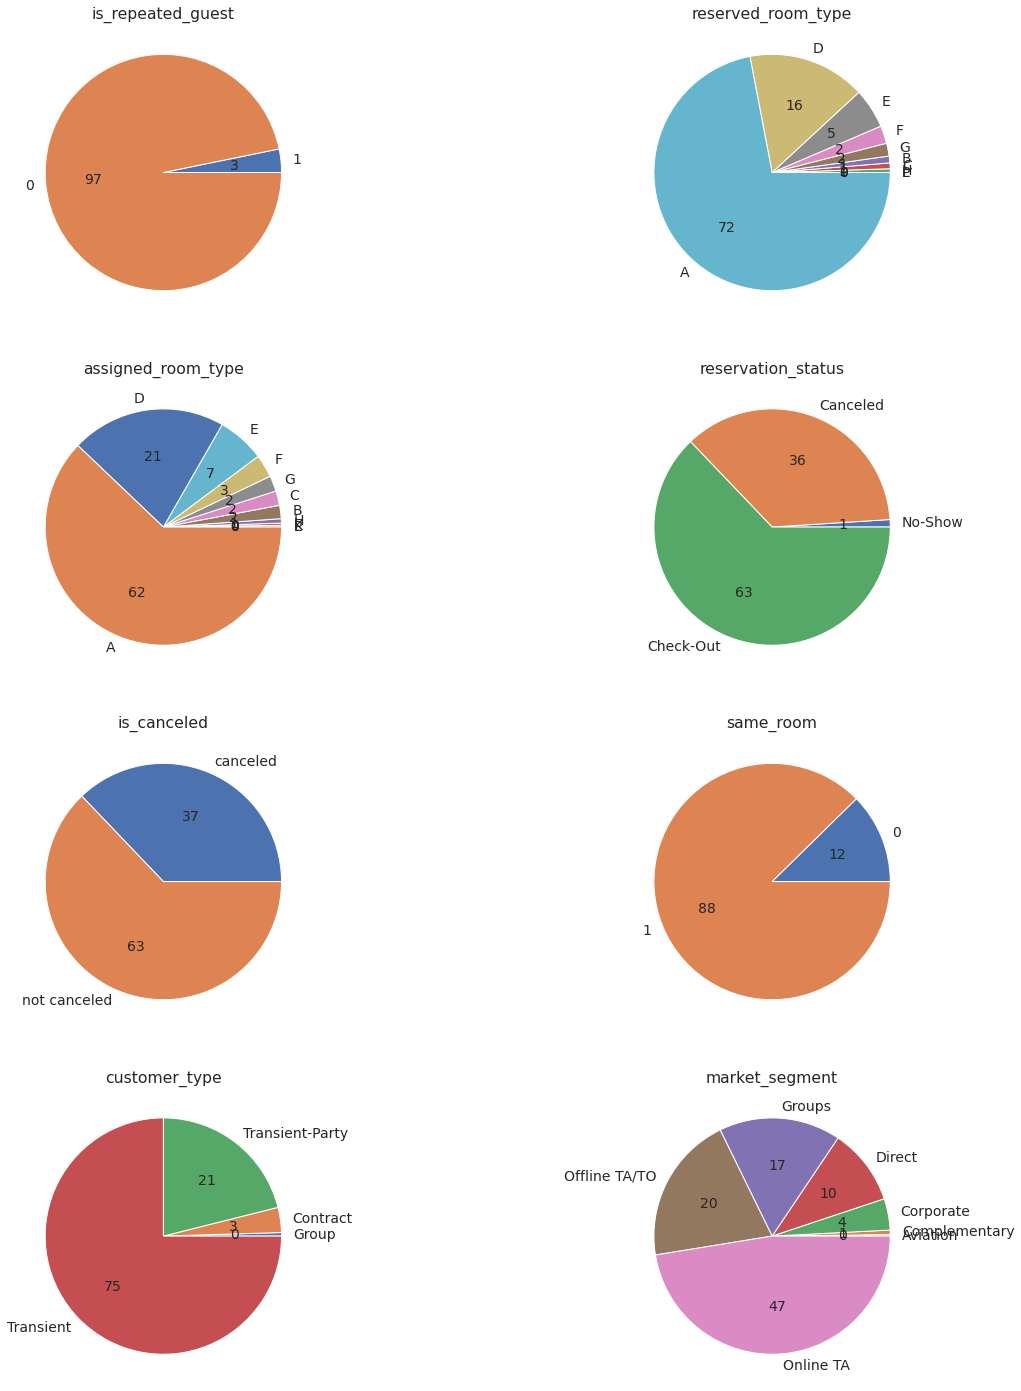

In [ ]:
plt.figure(figsize=(20,25))
for i, col in enumerate(data[cat_cols1]):
    plt.subplot(4,2,i+1)
    data[col].value_counts()[::-1].plot(kind = 'pie', title=col, fontsize=14, autopct='%.0f')
    plt.ylabel('')
plt.show()

### Conclusions:

1) Only 3% of guests are repeated\
2) 72% guests book room type A but only 62% guests were assigned to the room type A\
3) 36% reservation were cancelled by guests\
4) 63% bookings were done and 37% bookings were cancelled\
5) 88% guests were assigned the same room
6) 75% customers are transient. These are the solo travellers\
7) Majority of the market segment is online TA 